# Import library

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, recall_score, precision_score, roc_auc_score, classification_report
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
file_path = '/kaggle/input/flighqeojqweiqjejqw/2016and2017-Data.csv'

# Read the CSV file into a Pandas DataFrame
df_comb = pd.read_csv(file_path)

# Display the first few rows of the dataset
df_comb

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,...,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,1,1,1,5,AA,N001AA,1494,12892,32575,11503,...,-6.0,143.0,143.0,110.0,748.0,NaN,NaN,NaN,NaN,NaN
1,1,1,1,5,AA,N001AA,1640,11503,31503,13930,...,7.0,165.0,156.0,132.0,1007.0,NaN,NaN,NaN,NaN,NaN
2,1,1,1,5,AA,N001AA,2353,13930,30977,11298,...,-27.0,160.0,132.0,113.0,802.0,NaN,NaN,NaN,NaN,NaN
3,1,1,1,5,AA,N003AA,1155,11503,31503,11298,...,6.0,139.0,145.0,98.0,721.0,NaN,NaN,NaN,NaN,NaN
4,1,1,1,5,AA,N003AA,1649,11298,30194,12441,...,-24.0,176.0,157.0,139.0,1047.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11117551,4,12,31,7,WN,N968WN,4557,13796,32457,13891,...,49.0,75.0,66.0,54.0,362.0,1.0,0.0,0.0,0.0,48.0
11117552,4,12,31,7,WN,N969WN,5123,10693,30693,11278,...,35.0,95.0,79.0,65.0,562.0,8.0,0.0,0.0,0.0,27.0
11117553,4,12,31,7,WN,N969WN,5123,11259,30194,13232,...,17.0,125.0,135.0,103.0,793.0,7.0,0.0,10.0,0.0,0.0
11117554,4,12,31,7,WN,N969WN,5123,13232,30977,10693,...,39.0,80.0,73.0,63.0,395.0,25.0,0.0,0.0,0.0,14.0


In [3]:
df_comb.columns

Index(['QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_CITY_MARKET_ID', 'DEST_AIRPORT_ID', 'DEST_CITY_MARKET_ID',
       'CRS_DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME',
       'ARR_DELAY', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME',
       'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'],
      dtype='object')

# Preprocessing

In [4]:
df_comb.drop(['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY','SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'TAXI_OUT','TAXI_IN','ACTUAL_ELAPSED_TIME', 'AIR_TIME']
            , axis=1, inplace=True)

In [5]:
df_comb.dropna(axis=0, inplace=True)
df_comb['Status'] = df_comb['ARR_DELAY'].apply(lambda x: 1 if x >= 15 else 0)
df_comb.drop(["ARR_DELAY"], axis=1, inplace=True)

In [6]:
labels = list(range(1,9))

df_comb['CRS_DEP_TIME'] = pd.cut(df_comb['CRS_DEP_TIME'], bins=8, labels=labels)
df_comb['CRS_ARR_TIME'] = pd.cut(df_comb['CRS_ARR_TIME'], bins=8, labels=labels)

In [7]:
#label encoding
columns = ['QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK','OP_UNIQUE_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID','ORIGIN_CITY_MARKET_ID','DEST_AIRPORT_ID', 'DEST_CITY_MARKET_ID', 'CRS_DEP_TIME', 'CRS_ARR_TIME'] 
ec = LabelEncoder()
for col in df_comb.columns: 
    if col in columns:
        df_comb[col + "_Encoded"] = ec.fit_transform(df_comb[col])
        df_comb.drop(col, inplace=True, axis=1)

<Axes: >

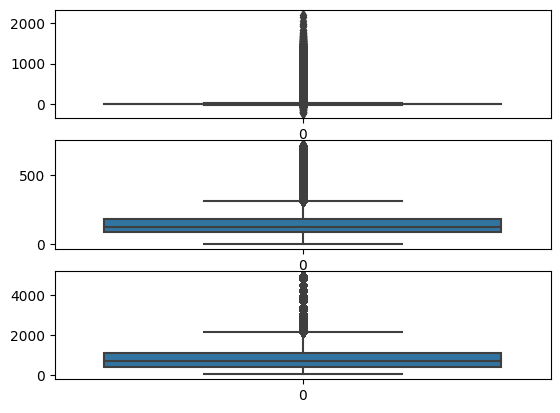

In [8]:
fig, ax = plt.subplots(3)

sns.boxplot(df_comb['DEP_DELAY'], ax=ax[0])

sns.boxplot(df_comb['CRS_ELAPSED_TIME'], ax=ax[1])

sns.boxplot(df_comb['DISTANCE'], ax=ax[2])

In [9]:
condition = (df_comb['DEP_DELAY'] > 180) | (df_comb['CRS_ELAPSED_TIME'] > 360) #Chiem 2,67% dataset
df_comb.drop(df_comb[condition].index, inplace=True)


<Axes: >

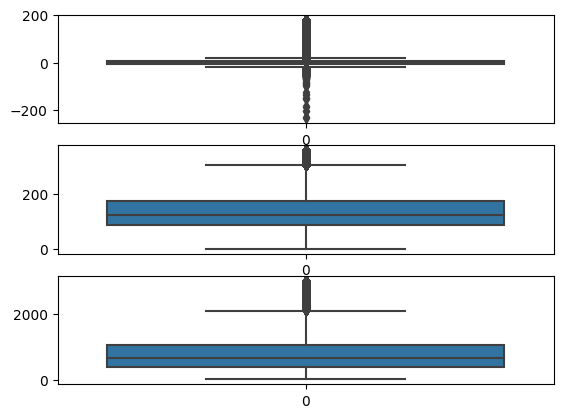

In [10]:
fig, ax = plt.subplots(3)

sns.boxplot(df_comb['DEP_DELAY'], ax=ax[0])

sns.boxplot(df_comb['CRS_ELAPSED_TIME'], ax=ax[1])

sns.boxplot(df_comb['DISTANCE'], ax=ax[2])

In [11]:
# Sử dụng stratified sampling để giữ proportion của 2 class tương tự như dataset gốc
df = df_comb.groupby('Status', group_keys=False).apply(lambda x: x.sample(int(np.rint(10000*len(x)/len(df_comb))))).sample(frac=1).reset_index(drop=True)

In [12]:
df.Status.value_counts(normalize=True)

Status
0    0.8293
1    0.1707
Name: proportion, dtype: float64

In [13]:
df

,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,Status,QUARTER_Encoded,MONTH_Encoded,DAY_OF_MONTH_Encoded,DAY_OF_WEEK_Encoded,OP_UNIQUE_CARRIER_Encoded,TAIL_NUM_Encoded,OP_CARRIER_FL_NUM_Encoded,ORIGIN_AIRPORT_ID_Encoded,ORIGIN_CITY_MARKET_ID_Encoded,DEST_AIRPORT_ID_Encoded,DEST_CITY_MARKET_ID_Encoded,CRS_DEP_TIME_Encoded,CRS_ARR_TIME_Encoded
0,-6.0,144.0,719.0,0,3,9,25,2,9,1966,1998,104,124,225,74,2,2
1,115.0,69.0,290.0,1,2,6,2,6,3,1324,791,284,260,39,55,6,7
2,78.0,341.0,2565.0,1,2,8,8,4,9,243,1916,276,169,103,124,3,6
3,-7.0,89.0,453.0,0,2,7,21,1,3,4778,1910,182,177,20,29,3,3
4,-2.0,135.0,813.0,0,2,8,14,3,0,1727,1412,307,35,84,16,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-12.0,299.0,2434.0,0,0,1,25,4,9,465,1655,287,176,103,124,7,1
9996,-4.0,174.0,1212.0,0,2,7,23,2,0,2192,2330,84,16,226,221,6,7
9997,28.0,87.0,391.0,1,0,0,19,4,5,3237,578,284,260,83,26,7,7
9998,124.0,105.0,411.0,1,1,5,7,3,8,3699,4442,71,15,284,261,5,6


In [14]:
def Standard_Scaler (dfc, col_names_to_scale):
    features = dfc[col_names_to_scale]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    dfc[col_names_to_scale] = features

    return dfc


In [15]:
# Chuẩn hóa data
df_delayed = Standard_Scaler(df, df.drop('Status', axis=1).columns)
new_X = df_delayed.drop('Status', axis=1)
new_y = df_delayed['Status']
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=42, stratify=new_y)

# SUPPORT VECTOR MACHINE

In [16]:
from sklearn.svm import SVC

# No Sampling

In [17]:
svc = SVC()
svc.fit(new_X_train, new_y_train)

SVC()

In [18]:
y_nosamp = svc.predict(new_X_test)
print(classification_report(new_y_test, y_nosamp))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1659
           1       0.96      0.66      0.78       341

    accuracy                           0.94      2000
   macro avg       0.95      0.83      0.87      2000
weighted avg       0.94      0.94      0.93      2000



## SMOTETomek

In [19]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline, make_pipeline

SMOTETomek_pipeline = make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')),
                                    SVC(kernel='rbf', C=1.0, probability=True, random_state=13))

# Fit the pipeline with SVM
SMOTETomek_svm = SMOTETomek_pipeline
SMOTETomek_svm.fit(new_X_train, new_y_train)

Pipeline(steps=[('smotetomek',
                 SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
                ('svc', SVC(probability=True, random_state=13))])

In [20]:
y_pred = SMOTETomek_svm.predict(new_X_test)

### Validate

In [21]:
print(classification_report(new_y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1659
           1       0.71      0.78      0.74       341

    accuracy                           0.91      2000
   macro avg       0.83      0.86      0.84      2000
weighted avg       0.91      0.91      0.91      2000



## SMOTEENN

In [22]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

In [23]:
SMOTEENN_pipeline_svm = make_pipeline(SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority')),
                                      SVC(kernel='rbf'))  

SMOTEENN_svm = SMOTEENN_pipeline_svm
SMOTEENN_svm.fit(new_X_train, new_y_train)


Pipeline(steps=[('smoteenn',
                 SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))),
                ('svc', SVC())])

### Validate

In [24]:
y_pred1 = SMOTEENN_svm.predict(new_X_test)

In [25]:
print(classification_report(new_y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1659
           1       0.60      0.83      0.70       341

    accuracy                           0.88      2000
   macro avg       0.78      0.86      0.81      2000
weighted avg       0.90      0.88      0.88      2000



## SMOTE-RUS

In [26]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [27]:


# Tạo pipeline mới với SMOTE-RUS và RandomForestClassifier
SMOTERUS_pipeline_svm = make_pipeline(SMOTE(sampling_strategy='minority'), 
                                      RandomUnderSampler(sampling_strategy='majority'),
                                      SVC(kernel='rbf'))

SMOTERUS_svm = SMOTERUS_pipeline_svm
SMOTERUS_svm.fit(new_X_train, new_y_train)


Pipeline(steps=[('smote', SMOTE(sampling_strategy='minority')),
                ('randomundersampler',
                 RandomUnderSampler(sampling_strategy='majority')),
                ('svc', SVC())])

In [28]:
y_pred2 = SMOTERUS_svm.predict(new_X_test)
print(classification_report(new_y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1659
           1       0.71      0.79      0.75       341

    accuracy                           0.91      2000
   macro avg       0.83      0.86      0.85      2000
weighted avg       0.91      0.91      0.91      2000



### Validate

In [29]:
# Predict probabilities for each model
from sklearn.metrics import roc_auc_score

y_score_tomek = SMOTETomek_svm.decision_function(new_X_test)
y_score_enn = SMOTEENN_svm.decision_function(new_X_test)
y_score_rus = SMOTERUS_svm.decision_function(new_X_test)

# Calculate ROC-AUC for each model
roc_auc_tomek = roc_auc_score(new_y_test, y_score_tomek)
roc_auc_enn = roc_auc_score(new_y_test, y_score_enn)
roc_auc_rus = roc_auc_score(new_y_test, y_score_rus)
roc_nosamp = roc_auc_score(new_y_test, y_nosamp)

print("ROC-AUC for SMOTETomek SVM:", roc_auc_tomek)
print("ROC-AUC for SMOTEENN SVM:", roc_auc_enn)
print("ROC-AUC for SMOTERUS SVM:", roc_auc_rus)
print("ROC-AUC no sampling:", roc_nosamp)

ROC-AUC for SMOTETomek SVM: 0.9133226920078696
ROC-AUC for SMOTEENN SVM: 0.9125219411050363
ROC-AUC for SMOTERUS SVM: 0.9154103008737553
ROC-AUC no sampling: 0.825431884027229


# KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# KNN no sampling

In [31]:
knn = KNeighborsClassifier()
knn.fit(new_X_train, new_y_train)

y_nosamp2 = knn.predict(new_X_test)
print(classification_report(new_y_test, y_nosamp2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1659
           1       0.91      0.45      0.60       341

    accuracy                           0.90      2000
   macro avg       0.90      0.72      0.77      2000
weighted avg       0.90      0.90      0.88      2000



## SMOTETomek

In [32]:
# Create pipeline with SMOTETomek and KNN
SMOTETomek_pipeline_knn = make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')),
                                        KNeighborsClassifier(n_neighbors=2))

# Fit the pipeline with KNN
SMOTETomek_knn = SMOTETomek_pipeline_knn
SMOTETomek_knn.fit(new_X_train, new_y_train)

Pipeline(steps=[('smotetomek',
                 SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=2))])

### Validate

In [33]:
y_pred_KNN = SMOTETomek_knn.predict(new_X_test)
cm_KNN = confusion_matrix(new_y_test, y_pred_KNN)


print(cm_KNN)

[[1504  155]
 [ 149  192]]


In [34]:
print(classification_report(new_y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1659
           1       0.55      0.56      0.56       341

    accuracy                           0.85      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.85      0.85      0.85      2000



## SMOTEENN

In [35]:
SMOTEENN_pipeline_knn = make_pipeline(SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority')),
                                      KNeighborsClassifier(n_neighbors=2))  # You can adjust the number of neighbors as needed

# Fit the pipeline with KNN
SMOTEENN_knn = SMOTEENN_pipeline_knn
SMOTEENN_knn.fit(new_X_train, new_y_train)

Pipeline(steps=[('smoteenn',
                 SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=2))])

### Validate

In [36]:
y_pred_KNN1 = SMOTEENN_knn.predict(new_X_test)
cm_KNN1 = confusion_matrix(new_y_test, y_pred_KNN1)


print(cm_KNN1)

[[1400  259]
 [ 121  220]]


In [37]:
print(classification_report(new_y_test, y_pred_KNN1))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1659
           1       0.46      0.65      0.54       341

    accuracy                           0.81      2000
   macro avg       0.69      0.74      0.71      2000
weighted avg       0.84      0.81      0.82      2000



## SMOTE-RUS

In [38]:
SMOTERUS_pipeline_knn = make_pipeline(SMOTE(sampling_strategy='minority'), 
                                      RandomUnderSampler(sampling_strategy='majority'),
                                      KNeighborsClassifier(n_neighbors=2))

SMOTERUS_knn = SMOTERUS_pipeline_knn
SMOTERUS_knn.fit(new_X_train, new_y_train)

Pipeline(steps=[('smote', SMOTE(sampling_strategy='minority')),
                ('randomundersampler',
                 RandomUnderSampler(sampling_strategy='majority')),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=2))])

### Validate

In [39]:
y_pred_KNN2 = SMOTERUS_knn.predict(new_X_test)
cm_KNN2 = confusion_matrix(new_y_test, y_pred_KNN2)

print(cm_KNN2)

[[1502  157]
 [ 154  187]]


In [40]:
print(classification_report(new_y_test, y_pred_KNN2))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1659
           1       0.54      0.55      0.55       341

    accuracy                           0.84      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.85      0.84      0.84      2000



In [41]:
y_pred_tomek = SMOTETomek_knn.predict(new_X_test)
y_pred_enn = SMOTEENN_knn.predict(new_X_test)
y_pred_rus = SMOTERUS_knn.predict(new_X_test)

# Calculate ROC-AUC for each model
roc_auc_tomek = roc_auc_score(new_y_test, y_pred_tomek)
roc_auc_enn = roc_auc_score(new_y_test, y_pred_enn)
roc_auc_rus = roc_auc_score(new_y_test, y_pred_rus)
roc_nosamp2 = roc_auc_score(new_y_test, y_nosamp2)

print("ROC-AUC for SMOTETomek KNN:", roc_auc_tomek)
print("ROC-AUC for SMOTEENN KNN:", roc_auc_enn)
print("ROC-AUC for SMOTERUS KNN:", roc_auc_rus)
print("ROC-AUC no_sampling for KNN", roc_nosamp2)

ROC-AUC for SMOTETomek KNN: 0.7348100381991767
ROC-AUC for SMOTEENN KNN: 0.7445215734313325
ROC-AUC for SMOTERUS KNN: 0.7268758871453849
ROC-AUC no_sampling for KNN 0.718353104633219


## RandomForest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf = RandomForestClassifier()
rf.fit(new_X_train, new_y_train)

y_nosamp3 = rf.predict(new_X_test)
print(classification_report(new_y_test, y_nosamp3))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1659
           1       0.92      0.68      0.78       341

    accuracy                           0.94      2000
   macro avg       0.93      0.84      0.87      2000
weighted avg       0.93      0.94      0.93      2000



### SMOTETomek

In [44]:
SMOTETomek_pipeline_rf = make_pipeline(
    SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')),
    RandomForestClassifier(n_estimators=100, random_state=13)  # You can adjust parameters here
)

# Fit the pipeline with RandomForest
SMOTETomek_rf = SMOTETomek_pipeline_rf
SMOTETomek_rf.fit(new_X_train, new_y_train)

Pipeline(steps=[('smotetomek',
                 SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=13))])

In [45]:
y_pred_rf = SMOTETomek_rf.predict(new_X_test)

# Calculate confusion matrix
cm_rf = confusion_matrix(new_y_test, y_pred_rf)


cm_rf

array([[1595,   64],
       [  81,  260]])

In [46]:
print(classification_report(new_y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1659
           1       0.80      0.76      0.78       341

    accuracy                           0.93      2000
   macro avg       0.88      0.86      0.87      2000
weighted avg       0.93      0.93      0.93      2000



### SMOTEENN

In [47]:
SMOTEENN_pipeline_rf = make_pipeline(SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority')),
                                      RandomForestClassifier(n_estimators=100, random_state=13))  # You can adjust the number of neighbors as needed

# Fit the pipeline with KNN
SMOTEENN_rf = SMOTEENN_pipeline_rf
SMOTEENN_rf.fit(new_X_train, new_y_train)

Pipeline(steps=[('smoteenn',
                 SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=13))])

In [48]:
y_pred_rf_1 = SMOTEENN_rf.predict(new_X_test)

# Calculate confusion matrix
cm_rf_1 = confusion_matrix(new_y_test, y_pred_rf)


cm_rf_1

array([[1595,   64],
       [  81,  260]])

In [49]:
print(classification_report(new_y_test, y_pred_rf_1))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1659
           1       0.67      0.81      0.73       341

    accuracy                           0.90      2000
   macro avg       0.81      0.86      0.84      2000
weighted avg       0.91      0.90      0.90      2000



### SMOTE-RUS

In [50]:
SMOTERUS_pipeline_rf = make_pipeline(SMOTE(sampling_strategy='minority'), 
                                      RandomUnderSampler(sampling_strategy='majority'),
                                      RandomForestClassifier(n_estimators=100, random_state=13))

SMOTERUS_rf = SMOTERUS_pipeline_rf
SMOTERUS_rf.fit(new_X_train, new_y_train)

Pipeline(steps=[('smote', SMOTE(sampling_strategy='minority')),
                ('randomundersampler',
                 RandomUnderSampler(sampling_strategy='majority')),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=13))])

In [51]:
y_pred_rf_2 = SMOTERUS_rf.predict(new_X_test)

# Calculate confusion matrix
cm_rf_2 = confusion_matrix(new_y_test, y_pred_rf)


cm_rf_2

array([[1595,   64],
       [  81,  260]])

In [52]:
print(classification_report(new_y_test, y_pred_rf_2))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1659
           1       0.80      0.77      0.79       341

    accuracy                           0.93      2000
   macro avg       0.88      0.87      0.87      2000
weighted avg       0.93      0.93      0.93      2000



In [53]:
y_pred_tomek = SMOTETomek_rf.predict(new_X_test)
y_pred_enn = SMOTEENN_rf.predict(new_X_test)
y_pred_rus = SMOTERUS_rf.predict(new_X_test)

# Calculate ROC-AUC for each model
roc_auc_tomek = roc_auc_score(new_y_test, y_pred_tomek)
roc_auc_enn = roc_auc_score(new_y_test, y_pred_enn)
roc_auc_rus = roc_auc_score(new_y_test, y_pred_rus)
roc_nosamp3 = roc_auc_score(new_y_test, y_nosamp3)

print("ROC-AUC for SMOTETomek RF:", roc_auc_tomek)
print("ROC-AUC for SMOTEENN RF:", roc_auc_enn)
print("ROC-AUC for SMOTERUS RF:", roc_auc_rus)
print("ROC-AUC no_sampling for RF:", roc_nosamp3)

ROC-AUC for SMOTETomek RF: 0.8619429434047646
ROC-AUC for SMOTEENN RF: 0.8637035347937757
ROC-AUC for SMOTERUS RF: 0.8675066596667249
ROC-AUC no_sampling for RF: 0.8353131148149523


## Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dt = DecisionTreeClassifier()
dt.fit(new_X_train, new_y_train)

y_nosamp4 = dt.predict(new_X_test)
print(classification_report(new_y_test, y_nosamp4))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1659
           1       0.62      0.69      0.66       341

    accuracy                           0.88      2000
   macro avg       0.78      0.80      0.79      2000
weighted avg       0.88      0.88      0.88      2000



In [56]:


# Define the pipeline with DecisionTreeClassifier
SMOTETomek_pipeline_dt = make_pipeline(
    SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')),
    DecisionTreeClassifier(random_state=13)  # You can adjust parameters here
)

# Fit the pipeline with DecisionTree
SMOTETomek_dt = SMOTETomek_pipeline_dt
SMOTETomek_dt.fit(new_X_train, new_y_train)

Pipeline(steps=[('smotetomek',
                 SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=13))])

In [57]:
y_pred_dt = SMOTETomek_dt.predict(new_X_test)

# Calculate confusion matrix
cm_dt = confusion_matrix(new_y_test, y_pred_dt)

cm_dt

array([[1510,  149],
       [  98,  243]])

In [58]:
print(classification_report(new_y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1659
           1       0.62      0.71      0.66       341

    accuracy                           0.88      2000
   macro avg       0.78      0.81      0.79      2000
weighted avg       0.88      0.88      0.88      2000



### SMOTEENN

In [59]:
SMOTEENN_pipeline_dt = make_pipeline(SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority')),
                                     DecisionTreeClassifier(random_state=13))  # You can adjust the number of neighbors as needed

# Fit the pipeline with KNN
SMOTEENN_dt = SMOTEENN_pipeline_dt
SMOTEENN_dt.fit(new_X_train, new_y_train)

Pipeline(steps=[('smoteenn',
                 SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=13))])

In [60]:
y_pred_dt1 = SMOTEENN_dt.predict(new_X_test)

# Calculate confusion matrix
cm_dt1 = confusion_matrix(new_y_test, y_pred_dt1)

cm_dt1

array([[1432,  227],
       [  75,  266]])

In [61]:
print(classification_report(new_y_test, y_pred_dt1))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      1659
           1       0.54      0.78      0.64       341

    accuracy                           0.85      2000
   macro avg       0.74      0.82      0.77      2000
weighted avg       0.88      0.85      0.86      2000



### SMOTE-RUS

In [62]:
SMOTERUS_pipeline_dt = make_pipeline(SMOTE(sampling_strategy='minority'), 
                                      RandomUnderSampler(sampling_strategy='majority'),
                                      DecisionTreeClassifier(random_state=13))

SMOTERUS_dt = SMOTERUS_pipeline_dt
SMOTERUS_dt.fit(new_X_train, new_y_train)

Pipeline(steps=[('smote', SMOTE(sampling_strategy='minority')),
                ('randomundersampler',
                 RandomUnderSampler(sampling_strategy='majority')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=13))])

In [63]:
y_pred_dt2 = SMOTERUS_dt.predict(new_X_test)

# Calculate confusion matrix
cm_dt2 = confusion_matrix(new_y_test, y_pred_dt2)

cm_dt2

array([[1500,  159],
       [  90,  251]])

In [64]:
print(classification_report(new_y_test, y_pred_dt2))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1659
           1       0.61      0.74      0.67       341

    accuracy                           0.88      2000
   macro avg       0.78      0.82      0.80      2000
weighted avg       0.89      0.88      0.88      2000



In [65]:
y_pred_tomek = SMOTETomek_dt.predict(new_X_test)
y_pred_enn = SMOTEENN_dt.predict(new_X_test)
y_pred_rus = SMOTERUS_dt.predict(new_X_test)

# Calculate ROC-AUC for each model
roc_auc_tomek = roc_auc_score(new_y_test, y_pred_tomek)
roc_auc_enn = roc_auc_score(new_y_test, y_pred_enn)
roc_auc_rus = roc_auc_score(new_y_test, y_pred_rus)
roc_nosamp4 = roc_auc_score(new_y_test, y_nosamp4)

print("ROC-AUC for SMOTETomek DT:", roc_auc_tomek)
print("ROC-AUC for SMOTEENN DT:", roc_auc_enn)
print("ROC-AUC for SMOTERUS DT:", roc_auc_rus)
print("ROC-AUC no_sampling for DT:", roc_nosamp4)

ROC-AUC for SMOTETomek DT: 0.8113984151142175
ROC-AUC for SMOTEENN DT: 0.8216146178579825
ROC-AUC for SMOTERUS DT: 0.8201147566194524
ROC-AUC no_sampling for DT: 0.8029428037594636


## XGBoost

In [66]:
from xgboost import XGBClassifier

In [67]:
xgb = XGBClassifier()
xgb.fit(new_X_train, new_y_train)

y_nosamp5 = xgb.predict(new_X_test)
print(classification_report(new_y_test,y_nosamp5))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1659
           1       0.88      0.71      0.79       341

    accuracy                           0.93      2000
   macro avg       0.91      0.85      0.87      2000
weighted avg       0.93      0.93      0.93      2000



In [68]:
SMOTETomek_pipeline_xgb = make_pipeline(
    SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')),
    XGBClassifier(random_state=13)  # You can adjust parameters here
)

# Fit the pipeline with XGBoost
SMOTETomek_xgb = SMOTETomek_pipeline_xgb
SMOTETomek_xgb.fit(new_X_train, new_y_train)


Pipeline(steps=[('smotetomek',
                 SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=13, ...))])

In [69]:
y_pred_xgb = SMOTETomek_xgb.predict(new_X_test)

# Calculate confusion matrix
cm_xgb = confusion_matrix(new_y_test, y_pred_xgb)

cm_xgb

array([[1618,   41],
       [ 101,  240]])

In [70]:
print(classification_report(new_y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1659
           1       0.85      0.70      0.77       341

    accuracy                           0.93      2000
   macro avg       0.90      0.84      0.86      2000
weighted avg       0.93      0.93      0.93      2000



### SMOTEENN

In [71]:
SMOTEENN_pipeline_xgb = make_pipeline(SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority')),
                                     XGBClassifier(random_state=13))  # You can adjust the number of neighbors as needed

# Fit the pipeline with KNN
SMOTEENN_xgb = SMOTEENN_pipeline_xgb
SMOTEENN_xgb.fit(new_X_train, new_y_train)

Pipeline(steps=[('smoteenn',
                 SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=13, ...))])

In [72]:
y_pred_xgb1 = SMOTEENN_xgb.predict(new_X_test)

# Calculate confusion matrix
cm_xgb1 = confusion_matrix(new_y_test, y_pred_xgb1)

cm_xgb1

array([[1546,  113],
       [  78,  263]])

In [73]:
print(classification_report(new_y_test, y_pred_xgb1))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1659
           1       0.70      0.77      0.73       341

    accuracy                           0.90      2000
   macro avg       0.83      0.85      0.84      2000
weighted avg       0.91      0.90      0.91      2000



### SMOTE-RUS

In [74]:
SMOTERUS_pipeline_xgb = make_pipeline(SMOTE(sampling_strategy='minority'), 
                                      RandomUnderSampler(sampling_strategy='majority'),
                                      XGBClassifier(random_state=13))

SMOTERUS_xgb = SMOTERUS_pipeline_xgb
SMOTERUS_xgb.fit(new_X_train, new_y_train)

Pipeline(steps=[('smote', SMOTE(sampling_strategy='minority')),
                ('randomundersampler',
                 RandomUnderSampler(sampling_strategy='majority')),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metri...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=13, ...))])

In [75]:
y_pred_xgb2 = SMOTERUS_xgb.predict(new_X_test)

# Calculate confusion matrix
cm_xgb2 = confusion_matrix(new_y_test, y_pred_xgb2)

cm_xgb2

array([[1621,   38],
       [  99,  242]])

In [76]:
print(classification_report(new_y_test, y_pred_xgb2))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1659
           1       0.86      0.71      0.78       341

    accuracy                           0.93      2000
   macro avg       0.90      0.84      0.87      2000
weighted avg       0.93      0.93      0.93      2000



In [77]:
y_pred_tomek = SMOTETomek_xgb.predict(new_X_test)
y_pred_enn = SMOTEENN_xgb.predict(new_X_test)
y_pred_rus = SMOTERUS_xgb.predict(new_X_test)

# Calculate ROC-AUC for each model
roc_auc_tomek = roc_auc_score(new_y_test, y_pred_tomek)
roc_auc_enn = roc_auc_score(new_y_test, y_pred_enn)
roc_auc_rus = roc_auc_score(new_y_test, y_pred_rus)
roc_nosamp5 = roc_auc_score(new_y_test, y_nosamp5)

print("ROC-AUC for SMOTETomek XGB:", roc_auc_tomek)
print("ROC-AUC for SMOTEENN XGB:", roc_auc_enn)
print("ROC-AUC for SMOTERUS XGB:", roc_auc_rus)
print("ROC-AUC no_sampling for XGB:", roc_nosamp5)

ROC-AUC for SMOTETomek XGB: 0.8395493168870057
ROC-AUC for SMOTEENN XGB: 0.8515738378947852
ROC-AUC for SMOTERUS XGB: 0.8433860273386611
ROC-AUC no_sampling for XGB: 0.8451943456026756


# Stacked Generalization

In [78]:
from sklearn.model_selection import KFold
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [79]:
estimators = [('svc', SVC()),
                ('knn', KNeighborsClassifier()),
                ('decision_tree',  DecisionTreeClassifier()),
                ('xgb', XGBClassifier()),
                ('random_forest',RandomForestClassifier())]
    
    
    

In [80]:
clf0 = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=10)
clf0.fit(new_X_train, new_y_train)

StackingClassifier(cv=10,
                   estimators=[('svc', SVC()), ('knn', KNeighborsClassifier()),
                               ('decision_tree', DecisionTreeClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_type...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('random_forest', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

In [81]:
y_pred_hybrid_nosamp = clf0.predict(new_X_test)
print(classification_report(new_y_test, y_pred_hybrid_nosamp))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1659
           1       0.92      0.70      0.79       341

    accuracy                           0.94      2000
   macro avg       0.93      0.84      0.88      2000
weighted avg       0.94      0.94      0.93      2000



### SMOTETomek

In [82]:
estimators = [
    ('svc', make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')),
                          SVC(kernel='rbf', C=1.0, probability=True, random_state=13))),
    ('knn', make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')),
                          KNeighborsClassifier(n_neighbors=2))),
    ('decision_tree', make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')),
                                    DecisionTreeClassifier(random_state=13))),
    ('xgb', make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')),
                          XGBClassifier(random_state=13))),
    ('random_forest', make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')),
                                    RandomForestClassifier(n_estimators=100, random_state=13)))
]


In [83]:
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=10)
clf.fit(new_X_train, new_y_train)

StackingClassifier(cv=10,
                   estimators=[('svc',
                                Pipeline(steps=[('smotetomek',
                                                 SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
                                                ('svc',
                                                 SVC(probability=True,
                                                     random_state=13))])),
                               ('knn',
                                Pipeline(steps=[('smotetomek',
                                                 SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
                                                ('kneighborsclassifier',
                                                 KNeighborsClassifier(n_neighbors=2))])),
                               ('deci...
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=None,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=13, ...))])),
                               ('random_forest',
                                Pipeline(steps=[('smotetomek',
                                                 SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
                                                ('randomforestclassifier',
                                                 RandomForestClassifier(random_state=13))]))],
                   final_estimator=LogisticRegression())

In [84]:
y_pred_hybrid = clf.predict(new_X_test)

In [85]:
print(classification_report(new_y_test, y_pred_hybrid))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1659
           1       0.86      0.71      0.78       341

    accuracy                           0.93      2000
   macro avg       0.90      0.84      0.87      2000
weighted avg       0.93      0.93      0.93      2000



### SMOTEENN

In [86]:
sampling_strategy = {'svc': 'auto', 'knn': 'auto', 'decision_tree': 'auto', 'xgb': 'auto', 'random_forest': 'auto'}

estimators1 = [
    ('svc', make_pipeline(SMOTEENN(sampling_strategy=sampling_strategy['svc']),
                          SVC(kernel='rbf', C=1.0, probability=True, random_state=13))),
    ('knn', make_pipeline(SMOTEENN(sampling_strategy=sampling_strategy['knn']),
                          KNeighborsClassifier(n_neighbors=2))),
    ('decision_tree', make_pipeline(SMOTEENN(sampling_strategy=sampling_strategy['decision_tree']),
                                    DecisionTreeClassifier(random_state=13))),
    ('xgb', make_pipeline(SMOTEENN(sampling_strategy=sampling_strategy['xgb']),
                          XGBClassifier(random_state=13))),
    ('random_forest', make_pipeline(SMOTEENN(sampling_strategy=sampling_strategy['random_forest']),
                                    RandomForestClassifier(n_estimators=100, random_state=13)))
]

In [87]:
clf1 = StackingClassifier(estimators=estimators1, final_estimator=LogisticRegression(), cv=10)
clf1.fit(new_X_train, new_y_train)

StackingClassifier(cv=10,
                   estimators=[('svc',
                                Pipeline(steps=[('smoteenn', SMOTEENN()),
                                                ('svc',
                                                 SVC(probability=True,
                                                     random_state=13))])),
                               ('knn',
                                Pipeline(steps=[('smoteenn', SMOTEENN()),
                                                ('kneighborsclassifier',
                                                 KNeighborsClassifier(n_neighbors=2))])),
                               ('decision_tree',
                                Pipeline(steps=[('smoteenn', SMOTEENN()),
                                                ('decisiontreeclassifier',
                                                 DecisionTreeClassifier(...
                                                               max_depth=None,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=None,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=13, ...))])),
                               ('random_forest',
                                Pipeline(steps=[('smoteenn', SMOTEENN()),
                                                ('randomforestclassifier',
                                                 RandomForestClassifier(random_state=13))]))],
                   final_estimator=LogisticRegression())

In [88]:
y_pred_hybrid1 = clf1.predict(new_X_test)
print(classification_report(new_y_test, y_pred_hybrid1))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1659
           1       0.82      0.76      0.79       341

    accuracy                           0.93      2000
   macro avg       0.88      0.86      0.87      2000
weighted avg       0.93      0.93      0.93      2000



### SMOTE-RUS

In [89]:
estimators2 = [
    ('svc', make_pipeline(SMOTE(sampling_strategy=sampling_strategy['svc']),
                          RandomUnderSampler(),
                          SVC(kernel='rbf', C=1.0, probability=True, random_state=13))),
    ('knn', make_pipeline(SMOTE(sampling_strategy=sampling_strategy['knn']),
                          RandomUnderSampler(),
                          KNeighborsClassifier(n_neighbors=2))),
    ('decision_tree', make_pipeline(SMOTE(sampling_strategy=sampling_strategy['decision_tree']),
                                    RandomUnderSampler(),
                                    DecisionTreeClassifier(random_state=13))),
    ('xgb', make_pipeline(SMOTE(sampling_strategy=sampling_strategy['xgb']),
                          RandomUnderSampler(),
                          XGBClassifier(random_state=13))),
    ('random_forest', make_pipeline(SMOTE(sampling_strategy=sampling_strategy['random_forest']),
                                    RandomUnderSampler(),
                                    RandomForestClassifier(n_estimators=100, random_state=13)))
]

In [90]:
clf2 = StackingClassifier(estimators=estimators2, final_estimator=LogisticRegression(), cv=10)
clf2.fit(new_X_train, new_y_train)

StackingClassifier(cv=10,
                   estimators=[('svc',
                                Pipeline(steps=[('smote', SMOTE()),
                                                ('randomundersampler',
                                                 RandomUnderSampler()),
                                                ('svc',
                                                 SVC(probability=True,
                                                     random_state=13))])),
                               ('knn',
                                Pipeline(steps=[('smote', SMOTE()),
                                                ('randomundersampler',
                                                 RandomUnderSampler()),
                                                ('kneighborsclassifier',
                                                 KNeighborsClassifier(n_neighbors=2))])),
                               ('decision_tree',
                                Pipeline(step...
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=None,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=13, ...))])),
                               ('random_forest',
                                Pipeline(steps=[('smote', SMOTE()),
                                                ('randomundersampler',
                                                 RandomUnderSampler()),
                                                ('randomforestclassifier',
                                                 RandomForestClassifier(random_state=13))]))],
                   final_estimator=LogisticRegression())

In [91]:
y_pred_hybrid2 = clf2.predict(new_X_test)
print(classification_report(new_y_test, y_pred_hybrid2))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1659
           1       0.86      0.72      0.78       341

    accuracy                           0.93      2000
   macro avg       0.90      0.85      0.87      2000
weighted avg       0.93      0.93      0.93      2000



In [92]:
roc_auc_tomek = roc_auc_score(new_y_test, y_pred_hybrid)
roc_auc_enn = roc_auc_score(new_y_test, y_pred_hybrid1)
roc_auc_rus = roc_auc_score(new_y_test, y_pred_hybrid2)
roc_nosamp6 = roc_auc_score(new_y_test, y_pred_hybrid_nosamp)

print("ROC-AUC for SMOTETomek ensemble:", roc_auc_tomek)
print("ROC-AUC for SMOTEENN ensemble:", roc_auc_enn)
print("ROC-AUC for SMOTERUS ensemble:", roc_auc_rus)
print("ROC-AUC no_sampling for ensemble:", roc_nosamp6)

ROC-AUC for SMOTETomek ensemble: 0.8430846409613253
ROC-AUC for SMOTEENN ensemble: 0.8608187103491309
ROC-AUC for SMOTERUS ensemble: 0.8457158059036377
ROC-AUC no_sampling for ensemble: 0.8426444931140725
